In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import log10

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Count,-log10_Adjusted P-value,label
0,MITOCARTA3_MTPWnoChild_genename.gmt,OXPHOS subunits,46/60,3.628878e-11,3.193413e-09,2.331566,56.049712,Ndufb10;Ndufb7;Ndufa13;Cox6c;Sdhb;Ndufa6;Ndufs...,46,8.495745,OXPHOS\nsubunits
1,MITOCARTA3_MTPWnoChild_genename.gmt,Mitochondrial ribosome,53/76,4.433454e-10,1.950720e-08,2.137311,46.030574,Mrpl34;Mrpl21;Mrps6;Mrpl13;Mrps18b;Gadd45gip1;...,53,7.709805,Mitochondrial\nribosome
2,MITOCARTA3_MTPWnoChild_genename.gmt,CI subunits,26/34,1.235894e-06,3.625288e-05,2.227091,30.296708,Ndufb10;Ndufb7;Ndufa13;Ndufa6;Ndufs5;Ndufb11;N...,26,4.440658,Complex I\nsubunits
3,MITOCARTA3_MTPWnoChild_genename.gmt,CIV subunits,12/12,4.458087e-06,9.807792e-05,2.831193,34.882532,Cox7b;Cox8a;Cox5a;Cox7a2;Cox6c;Cox4i1;Cox6b1;C...,12,4.008429,Complex IV\nsubunits
4,MITOCARTA3_MTPWnoChild_genename.gmt,OXPHOS assembly factors,24/49,4.105660e-02,6.951296e-01,1.395549,4.455712,Tmem70;Uqcc2;Ndufaf4;Cmc1;Timmdc1;Coa4;Tmem126...,24,0.157934,OXPHOS\nassembly\nfactors


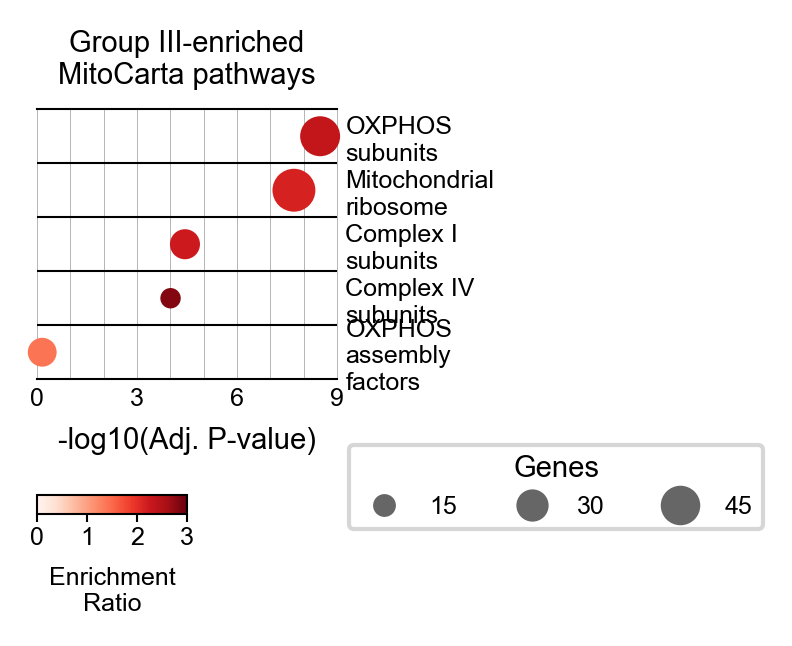

In [2]:
#options
PWnumber = 5 # pathway number; using row number
dot_size_factor = 2
xlims = {'APEXseq_Q4' : (0, 9)}
xticks= {'APEXseq_Q4' : [0,3,6,9]}

cutoff_std = 'Adjusted P-value'
cutoff_std_label = 'Adj. P-value'

GSs = ['APEXseq_Q4'] # Q4 = Group3

input_folder = f'{Project}/Results/Tables/EnrichR/v20240314_OMM-proxy'


for GS in GSs:     
    #load data
    data = pd.read_csv(f'{input_folder}/{GS}_Enrich.tsv', sep = '\t', header=0)
    # data = data[ ~data['Term'].str.startswith('GOMF') ]
    data = data.sort_values(by=[cutoff_std])
    data = data.reset_index(drop=True)
    
    #process data
    data = data.loc[range(PWnumber),]
    # data = data.loc[range(80,120),]
    
    data['Count'] = data['Genes'].str.split(';').str.len()
    
    data['-log10_'+cutoff_std] = list(map(log10,data[cutoff_std]))
    data['-log10_'+cutoff_std] = data['-log10_'+cutoff_std] * -1

    data['label'] = [name.replace(' ','\n').replace('CI','Complex I') for name in data['Term']]
    
    display(data)


    #plotting
    fig = plt.figure(figsize=(1, 0.18*PWnumber), dpi=300)
    ax1 = plt.axes([0,0,1,1])

    # ax1.axvline(-log10(0.05), color='r', alpha = 1, linewidth = .5, zorder=0.5) #redline
    for y in range(PWnumber-1): ax1.axhline(y+0.5, c='k', lw=0.5)
    for x in range(10): ax1.axvline(x, c='#AAAAAA', lw=0.2, zorder=-1, clip_on=False)
    main = ax1.scatter(data['-log10_'+cutoff_std], data['Term'], s=data['Count']*dot_size_factor, 
                       c=data['Odds Ratio'], cmap='Reds', vmin=0, vmax=3,
                       edgecolors='k', lw=0,
                       clip_on=False)
    plt.gca().invert_yaxis()
    
    ax1.set_xlim(xlims[GS])
    ax1.set_ylim(PWnumber-0.5, -0.5)
    ax1.set_xticks(xticks[GS])
    ax1.set_yticks([i for i in range(PWnumber)])
    ax1.set_yticklabels(data['label'])
    ax1.yaxis.tick_right()
    ax1.tick_params(length=0, pad=2)
    # ax1.grid(color='#808080', linestyle='--', linewidth=0.5)
    
    ax1.set_title('Group III-enriched\nMitoCarta pathways')
    ax1.set_xlabel(f'-log10({cutoff_std_label})')

    # ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    # ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    #colorbar&legend for DAVID scatter
    cb=plt.colorbar(main, cax = fig.add_axes([0, -0.5, 0.5, 0.07]), orientation='horizontal') #[1.1, 0.55, 0.1, 0.4]
    cb.set_ticks([0,1,2,3])
    cb.ax.tick_params(length=2, width=0.5, pad=1, labelsize=6)
    cb.set_label('Enrichment\nRatio', fontsize=6)

    
    handles, labels = main.legend_elements(prop="sizes", alpha=0.6, num=3)
    labels = [int(int(''.join(i for i in x if i.isdigit())) / dot_size_factor) for x in labels]
    ax1.legend(handles, labels, loc="lower left", bbox_to_anchor=(1,-0.6), ncol=3, title="Genes")
    
    
    plt.savefig(f'{GS}_EnrichR_dotplot.pdf', bbox_inches='tight')
    plt.show()